In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def nonlinear_coeff(asp,csp,nn):
    wn = np.zeros(nn,dtype=np.complex64)
    gn = np.zeros(nn,dtype=np.complex64)
    for n in range(0,nn):
        for k in range(0,n):
            wn[n] += asp[k]*asp[n-k]
            gn[n] += 2.0j*(n-k)*csp[n]*asp[n-k]
            #gn[n] += 1.0j*csp[n]*asp[n-k]
    return wn,gn

In [9]:
def sp_linear(ssp,asp,tau,deltat):
    asp3 = 1/(1.0+deltat/tau) * (ssp*deltat + asp)
    return asp3

In [8]:
def sp_diffusion(asp,dcoeff,deltat):
    asp2 = np.zeros(len(asp),dtype=np.complex64)
    for n in range(0,len(asp2)):
        asp2[n] = 1.0/(1+dcoeff*deltat*n**2) * asp[n]
    return asp2

In [7]:
def sp_nonlinear(asp,wn,gn,alpha,deltat):
    asp1 = asp + deltat*(alpha*wn - gn)
    return asp1

In [25]:
def integrate(agp,cgp,sgp,alpha,tau,dcoeff,history=True,nsteps=1):
    if history:
        hagp = np.zeros((nsteps+1,len(agp)))
        hagp[0,:] = agp[:]
    else:
        hagp = np.zeros(len(agp))
    
    asp = np.fft.fft(agp)
    ssp = np.fft.fft(sgp)
    csp = np.fft.fft(cgp)
    
    #asp1 = np.zeros(len(asp),dtype=np.complex64)
    #asp2 = np.zeros(len(asp),dtype=np.complex64)
    #asp3 = np.zeros(len(asp),dtype=np.complex64)
    
    deltat = len(agp)/np.amax(cgp)
    
    for nt in range(0,nsteps):
        wn,gn = nonlinear_coeff(asp,csp,len(asp))
        asp1 = sp_nonlinear(asp,wn,gn,alpha,deltat)
        asp2 = sp_diffusion(asp,dcoeff,deltat)
        asp3 = sp_linear(ssp,asp,tau,deltat)
        
        asp = asp1 + asp2 + asp3
        
        if history:
            hagp[nt+1,:] = np.fft.fft(asp)
    
    if not history:
        hagp[:] = np.fft.ifft(asp).real
        
    return hagp

In [26]:
agp = np.zeros(128)
cgp = np.sin(np.linspace(0,2*np.pi,num=128))*0.01
sgp = np.sin(np.linspace(0,2*np.pi,num=128)+np.pi/3.0)*0.001
alpha = 1.0
tau = 1.0
dcoeff = 0.05


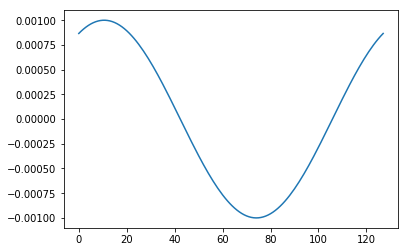

In [29]:
plt.plot(integrate(agp,cgp,sgp,alpha,tau,dcoeff,history=False,nsteps=1))